In [31]:
import spacy
import nltk
nlp = spacy.load('en_core_web_lg')
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
def clean_text(text):
    nlp_text = nlp(text)
    lemmas = [w.lower_ if w.lemma == '-PRON-' else w.lemma_ 
              for w in nlp_text if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas)

In [11]:
test_string = '''	 Jinxy Blastwheel 
 Bragni	170
Void Focus - Unlocking and Upgrading
You will need to unlock the Void Focus and upgrade it to its max level in order to craft all of the Patch 8.3 Visions of N'Zoth recipes (ilvl 440/455/470 Jewelcrafting rings). The Void Focus is very similar to Patch 8.2's Abyssal Focus, as the Heroic and Mythic level crafts will require the Void Focus to be unlocked and upgraded.

The Void Focus is located in the Chamber of Heart. Unlocking and upgrading the Void Focus is permanent. Once crafted, you can always craft gear that requires the Void Focus. The Heroic-level craft is called the "Empowered Void Focus" and the Mythic level is called "Dreadful Void Focus".

How to unlock the Void Focus:
Farm mobs in N'Zoth invasions or Lesser Visions for  Recipe: Void Focus and use the item
Farm more mobs in the same places for 10x  Void Focus Splinter and then open your professions and craft the Void Focus
While farming mobs, you're also looking for your Profession patterns. If you've collect 10x  Void Focus Splinter and haven't gotten your patterns, keep farming even more N'Zoth mobs!
This grants you the  Something in Your Mind quest which you can turn in at Wrathion which unlocks the Void Focus and Normal Crafting gear (ilvl 440).
Accept  Maintaining Focus which requires you to collect 20x  Shred of Insanity. Completing this unlocks Heroic Crafting gear (ilvl 455).
Accept  Dream Catcher which requires you to collect 200x  Shred of Insanity. Completing this unlocks Mythic Crafting gear (ilvl 470).

Patch 8.2 Changes
There are several changes coming to Jewelcraftingalong with many other profession in Patch 8.2.
The maximum skill level of Zandalari and Kul Tiran Jewelcrafting is going up to 175 (Old cap was 150).
Most of the new patterns will require you to level up your skill level to this new cap in order to craft the best gear.
New Ore to prospect called Osmenite
Prospecting Osmenite grants Epic Gems.
New Recipes for Epic Gems.
New Recipes for upgraded Rings (410/425/440 item level).
Scrapping Eternal Palace raid-level crafted gear refunds slightly less the amount of Expulsom spent to craft it.
New Notorious (370 item level) Staff recipe.
Raid quality gear no longer requires materials from dungeons and raids, and is instead unlocked by completing the Abyssal Focus quests.
Raid quality gear now always comes with a gem socket'''

In [12]:
clean_string = clean_text(test_string)

In [13]:
doc = nlp(test_string)

In [14]:
doc

	 Jinxy Blastwheel 
 Bragni	170
Void Focus - Unlocking and Upgrading
You will need to unlock the Void Focus and upgrade it to its max level in order to craft all of the Patch 8.3 Visions of N'Zoth recipes (ilvl 440/455/470 Jewelcrafting rings). The Void Focus is very similar to Patch 8.2's Abyssal Focus, as the Heroic and Mythic level crafts will require the Void Focus to be unlocked and upgraded.

The Void Focus is located in the Chamber of Heart. Unlocking and upgrading the Void Focus is permanent. Once crafted, you can always craft gear that requires the Void Focus. The Heroic-level craft is called the "Empowered Void Focus" and the Mythic level is called "Dreadful Void Focus".

How to unlock the Void Focus:
Farm mobs in N'Zoth invasions or Lesser Visions for  Recipe: Void Focus and use the item
Farm more mobs in the same places for 10x  Void Focus Splinter and then open your professions and craft the Void Focus
While farming mobs, you're also looking for your Profession patterns. I

In [26]:
words = []
pos = []
pos_words = ['PROPN','VERB','ADP','NOUN','ADP','NUM']
for word in doc:
    if word.is_alpha or word.is_digit:
        print(word.lower_, word.pos_)
        words.append(word.lower_)
        pos.append(word.pos_)

jinxy PROPN
blastwheel PROPN
bragni PROPN
170 NUM
void PROPN
focus PROPN
unlocking PROPN
and CCONJ
upgrading VERB
you PRON
will AUX
need VERB
to PART
unlock VERB
the DET
void PROPN
focus PROPN
and CCONJ
upgrade VERB
it PRON
to ADP
its PRON
max NOUN
level NOUN
in ADP
order NOUN
to PART
craft VERB
all DET
of ADP
the DET
patch PROPN
visions NOUN
of ADP
recipes NOUN
ilvl PROPN
jewelcrafting PROPN
rings VERB
the DET
void PROPN
focus PROPN
is AUX
very ADV
similar ADJ
to ADP
patch VERB
abyssal PROPN
focus PROPN
as SCONJ
the DET
heroic ADJ
and CCONJ
mythic ADJ
level NOUN
crafts NOUN
will AUX
require VERB
the DET
void PROPN
focus PROPN
to PART
be AUX
unlocked VERB
and CCONJ
upgraded VERB
the DET
void PROPN
focus PROPN
is AUX
located VERB
in ADP
the DET
chamber PROPN
of ADP
heart PROPN
unlocking VERB
and CCONJ
upgrading VERB
the DET
void PROPN
focus PROPN
is AUX
permanent ADJ
once ADV
crafted VERB
you PRON
can AUX
always ADV
craft VERB
gear NOUN
that PRON
requires VERB
the DET
void PROPN
focus P

In [27]:
df = pd.DataFrame({'word':words, 'pos':pos})

In [28]:
df['pos'].value_counts()

PROPN    78
NOUN     72
VERB     61
ADP      33
DET      29
PRON     24
ADJ      23
AUX      16
CCONJ    15
ADV      14
PART     10
NUM       7
SCONJ     3
Name: pos, dtype: int64

In [18]:
woo = []
with open('C:\\Users\\bsieb\\Documents\\GitHub\\MSDS-682-Text-Analytics\\Week-2\\wizard_of_oz_stories.pk', 'rb') as oz:
    woo.append(pickle.load(oz))

In [29]:
df.groupby('word')['pos'].value_counts()

word        pos  
150         NUM       1
170         NUM       1
175         NUM       1
370         NUM       1
440         NUM       1
455         NUM       1
470         NUM       1
a           DET       1
abyssal     PROPN     2
accept      VERB      2
all         DET       1
also        ADV       1
always      ADV       2
amount      NOUN      1
and         CCONJ    14
are         AUX       1
as          SCONJ     1
at          ADP       1
be          AUX       1
best        ADJ       1
blastwheel  PROPN     1
bragni      PROPN     1
by          ADP       1
called      VERB      3
can         AUX       2
cap         NOUN      2
catcher     PROPN     1
chamber     PROPN     1
changes     NOUN      2
collect     VERB      3
                     ..
the         DET      23
then        ADV       1
there       PRON      1
this        DET       4
tiran       PROPN     1
to          PART     10
            ADP       5
turn        VERB      1
unlock      VERB      2
unlocked    VERB      

In [22]:
groups = df.groupby('word')

In [24]:
for w in groups:
    print(w)

('\t',   word    pos
5   \t  SPACE)
('\t ',   word    pos
0  \t   SPACE)
('\n',     word    pos
7     \n  SPACE
14    \n  SPACE
149   \n  SPACE
168   \n  SPACE
192   \n  SPACE
229   \n  SPACE
261   \n  SPACE
288   \n  SPACE
319   \n  SPACE
335   \n  SPACE
358   \n  SPACE
385   \n  SPACE
392   \n  SPACE
399   \n  SPACE
406   \n  SPACE
418   \n  SPACE
439   \n  SPACE
450   \n  SPACE
474   \n  SPACE)
('\n\n',      word    pos
81   \n\n  SPACE
141  \n\n  SPACE
315  \n\n  SPACE)
('\n ',   word    pos
3  \n   SPACE)
(' ',     word    pos
159       SPACE
178       SPACE
211       SPACE
234       SPACE
263       SPACE
272       SPACE
290       SPACE
299       SPACE)
('!',     word    pos
228    !  PUNCT)
('"',     word    pos
124    "  PUNCT
128    "  PUNCT
135    "  PUNCT
139    "  PUNCT)
("'re",     word  pos
198  're  AUX)
("'s",    word   pos
59   's  PART)
("'ve",     word  pos
208  've  AUX)
('(',     word    pos
43     (  PUNCT
256    (  PUNCT
283    (  PUNCT
310    (  PUNCT
351    (  P

421  palace  PROPN)
('patch',       word    pos
37   patch  PROPN
57   patch   VERB
316  patch  PROPN
332  patch  PROPN)
('patterns',          word   pos
204  patterns  NOUN
220  patterns  NOUN
363  patterns  NOUN)
('permanent',           word  pos
100  permanent  ADJ)
('places',        word   pos
175  places  NOUN)
('profession',            word   pos
203  profession  NOUN
330  profession  NOUN)
('professions',             word   pos
186  professions  NOUN)
('prospect',          word   pos
389  prospect  VERB)
('prospecting',             word   pos
393  prospecting  VERB)
('quality',         word   pos
452  quality  NOUN
476  quality  NOUN)
('quest',       word   pos
239  quest  NOUN)
('quests',        word   pos
472  quests  NOUN)
('raid',      word   pos
422  raid  NOUN
451  raid  NOUN
475  raid  NOUN)
('raids',       word   pos
461  raids  NOUN)
('recipe',        word    pos
160  recipe  PROPN
448  recipe   NOUN)
('recipes',         word    pos
42   recipes   NOUN
401  recipes  PRO

In [41]:
vectorizer = CountVectorizer(ngram_range = (2,2))

In [43]:
counts = vectorizer.fit_transform([test_string])

In [44]:
counts.todense()

matrix([[ 2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
          1,  1,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,
          1,  1,  1,  1,  4,  1,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  2,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,
          1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
          1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,
          2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1

In [52]:
counts.todense().flatten()[0,11]
stor_counts = np.array(counts.todense()).flatten()

In [45]:
vectorizer.vocabulary_

{'jinxy blastwheel': 147,
 'blastwheel bragni': 42,
 'bragni 170': 43,
 '170 void': 2,
 'void focus': 301,
 'focus unlocking': 93,
 'unlocking and': 285,
 'and upgrading': 35,
 'upgrading you': 295,
 'you will': 317,
 'will need': 307,
 'need to': 179,
 'to unlock': 280,
 'unlock the': 282,
 'the void': 263,
 'focus and': 84,
 'and upgrade': 33,
 'upgrade it': 291,
 'it to': 140,
 'to its': 274,
 'its max': 143,
 'max level': 168,
 'level in': 155,
 'in order': 125,
 'order to': 199,
 'to craft': 273,
 'craft all': 63,
 'all of': 19,
 'of the': 192,
 'the patch': 260,
 'patch visions': 208,
 'visions of': 300,
 'of zoth': 194,
 'zoth recipes': 326,
 'recipes ilvl': 229,
 'ilvl 440': 121,
 '440 455': 9,
 '455 470': 12,
 '470 jewelcrafting': 14,
 'jewelcrafting rings': 145,
 'rings the': 237,
 'focus is': 88,
 'is very': 138,
 'very similar': 298,
 'similar to': 242,
 'to patch': 277,
 'patch abyssal': 205,
 'abyssal focus': 16,
 'focus as': 85,
 'as the': 38,
 'the heroic': 255,
 'heroi

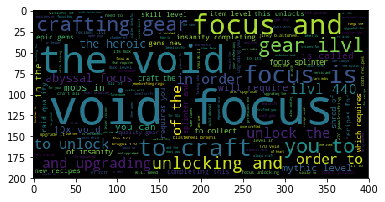

In [56]:
wc = WordCloud()
plt.imshow(wc.generate_from_frequencies(freq_dict))

In [53]:
freq_dict = {}
for v, i in vectorizer.vocabulary_.items():
    freq_dict[v] = stor_counts[i]

In [55]:
freq_dict

{'jinxy blastwheel': 1,
 'blastwheel bragni': 1,
 'bragni 170': 1,
 '170 void': 1,
 'void focus': 15,
 'focus unlocking': 1,
 'unlocking and': 2,
 'and upgrading': 2,
 'upgrading you': 1,
 'you will': 1,
 'will need': 1,
 'need to': 1,
 'to unlock': 2,
 'unlock the': 2,
 'the void': 9,
 'focus and': 4,
 'and upgrade': 1,
 'upgrade it': 1,
 'it to': 1,
 'to its': 1,
 'its max': 1,
 'max level': 1,
 'level in': 1,
 'in order': 2,
 'order to': 2,
 'to craft': 3,
 'craft all': 1,
 'all of': 1,
 'of the': 2,
 'the patch': 1,
 'patch visions': 1,
 'visions of': 1,
 'of zoth': 1,
 'zoth recipes': 1,
 'recipes ilvl': 1,
 'ilvl 440': 2,
 '440 455': 1,
 '455 470': 1,
 '470 jewelcrafting': 1,
 'jewelcrafting rings': 1,
 'rings the': 1,
 'focus is': 3,
 'is very': 1,
 'very similar': 1,
 'similar to': 1,
 'to patch': 1,
 'patch abyssal': 1,
 'abyssal focus': 2,
 'focus as': 1,
 'as the': 1,
 'the heroic': 2,
 'heroic and': 1,
 'and mythic': 1,
 'mythic level': 2,
 'level crafts': 1,
 'crafts will'

In [57]:
750*4

3000

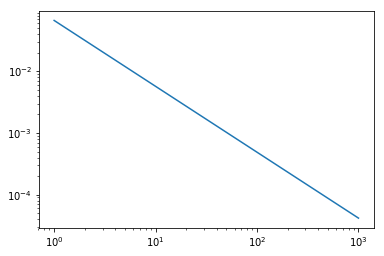

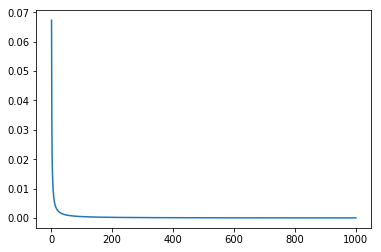

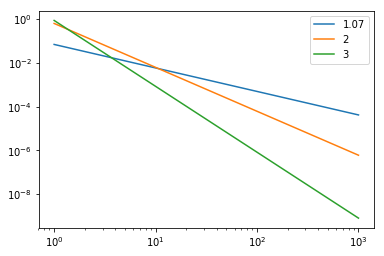

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zipf

x = np.arange(1, 1001)

plt.loglog(x, zipf.pmf(x, 1.07))
plt.show()

plt.plot(x, zipf.pmf(x, 1.07))
plt.show()


for i in [1.07, 2, 3]:
    plt.loglog(x, zipf.pmf(x, i), label=str(i))

plt.legend()
plt.show()